# __Assignment-1 Answers__

Importing the libraries

In [9]:
import numpy as np
import scipy as sp
import math as m
from prettytable import PrettyTable
from Library_asgn1 import *

### __Qn-1__: Solve $e^{−x}−x=0$ using fixed-point method, accurate up to 4 places in decimal(4).



#### Answer Q1:

The equation to solve is $e^{-x}-x=0$, so for the fixed point method we need the function of the form $x=g(x)$, so we can write the equation as:
\begin{equation}
x = e^{-x} \text{ so that} \quad g(x) = e^{-x}
\end{equation}

Here we will be using the fixed point method for single variable function which is defined in the Library_new.py file in the Assignments folder because we are only dealing one variable. The implementation is given below:

In [10]:
# Defining the function
def f1(x):
    return (np.exp(-x))-x
def g1(x):
    return np.exp(-x)

# Calling the Fixed Point Iteration Method
q1=Solve_Non_Linear_Equation_1D(g1,None,None,None,.000001)
guess=0
root,steps= q1.fixed_point(guess)

# Displaying the result
print("The root of the equation is: ", round(root,4))
print("The number of steps are: ", steps)

The root of the equation is:  0.5671
The number of steps are:  26


### __Qn-2:__ Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal (5)

\begin{equation}
\int_{0}^{1} \sqrt{1+x^4} dx
\end{equation}


#### Answer Q2:

In [11]:
# Defining the function
def f2(x):
    return np.sqrt(1+(x**4))

# Defining the limits and Number of subintervals
a_q2 = 0
b_q2 = 1
N= 100

# Calculating the integral using Newton-Cotes Quadrature
p2_1=Newton_Cotes(f2,a_q2,b_q2,N)
I_mid=p2_1.midpoint()
I_trap=p2_1.trapezoidal()
I_simp=p2_1.simpsons()

## Calculating the integral using Gaussian Quadrature
degree = 3
p2_2 = Gaussian_Quadrature(f2,a_q2,b_q2,degree)
I_gauss=p2_2.integrate()

# Displaying the result
I_list=[I_simp,I_mid,I_trap,I_gauss]
M_list=["Simpson's Rule","Midpoint Rule","Trapezoidal Rule","Gaussian Quadrature"]

# Create a new table
table_qn2 = PrettyTable()
table_qn2.field_names = ["Method","Integral (I)"]
for i in range(len(I_list)):
    table_qn2.add_row([M_list[i],round(I_list[i],6)])
print(table_qn2)

+---------------------+--------------+
|        Method       | Integral (I) |
+---------------------+--------------+
|    Simpson's Rule   |   1.089429   |
|    Midpoint Rule    |   1.089424   |
|   Trapezoidal Rule  |   1.089441   |
| Gaussian Quadrature |   1.089459   |
+---------------------+--------------+


### __Qn-3:__ Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01:

\begin{equation}
\frac{dy}{dx} = \frac{5x^2 - y}{e^{x+y}}, \quad y(0) = 1
\end{equation}

### Tabulate the results [5]

#### Answer Q3:

For this Question iam assuming the range of x to be from 0 to x. The input of the RK4 reqires the number of steps so we can calculate the number of steps using the formula:
\begin{equation}
\text{Number of steps} = \frac{\text{Range}}{\text{Interval size}}
\end{equation}



The items in the tables are coordinates (x,y) for each h value. The first value is x and the second value is y.
The complete table is too large to display. Here are the first 5 rows:
+---------------+---------------+----------------+----------------+
|     h=0.5     |     h=0.2     |     h=0.05     |     h=0.01     |
+---------------+---------------+----------------+----------------+
|     (0,1)     |     (0,1)     |     (0,1)      |     (0,1)      |
| (0.5,0.91319) |  (0.2,0.9378) | (0.05,0.98213) | (0.01,0.99634) |
| (1.0,1.07193) | (0.4,0.91044) | (0.1,0.96558)  | (0.02,0.99272) |
| (1.5,1.34978) | (0.6,0.92671) | (0.15,0.9507)  | (0.03,0.98914) |
| (2.0,1.61913) | (0.8,0.98381) |  (0.2,0.9378)  | (0.04,0.98561) |
+---------------+---------------+----------------+----------------+


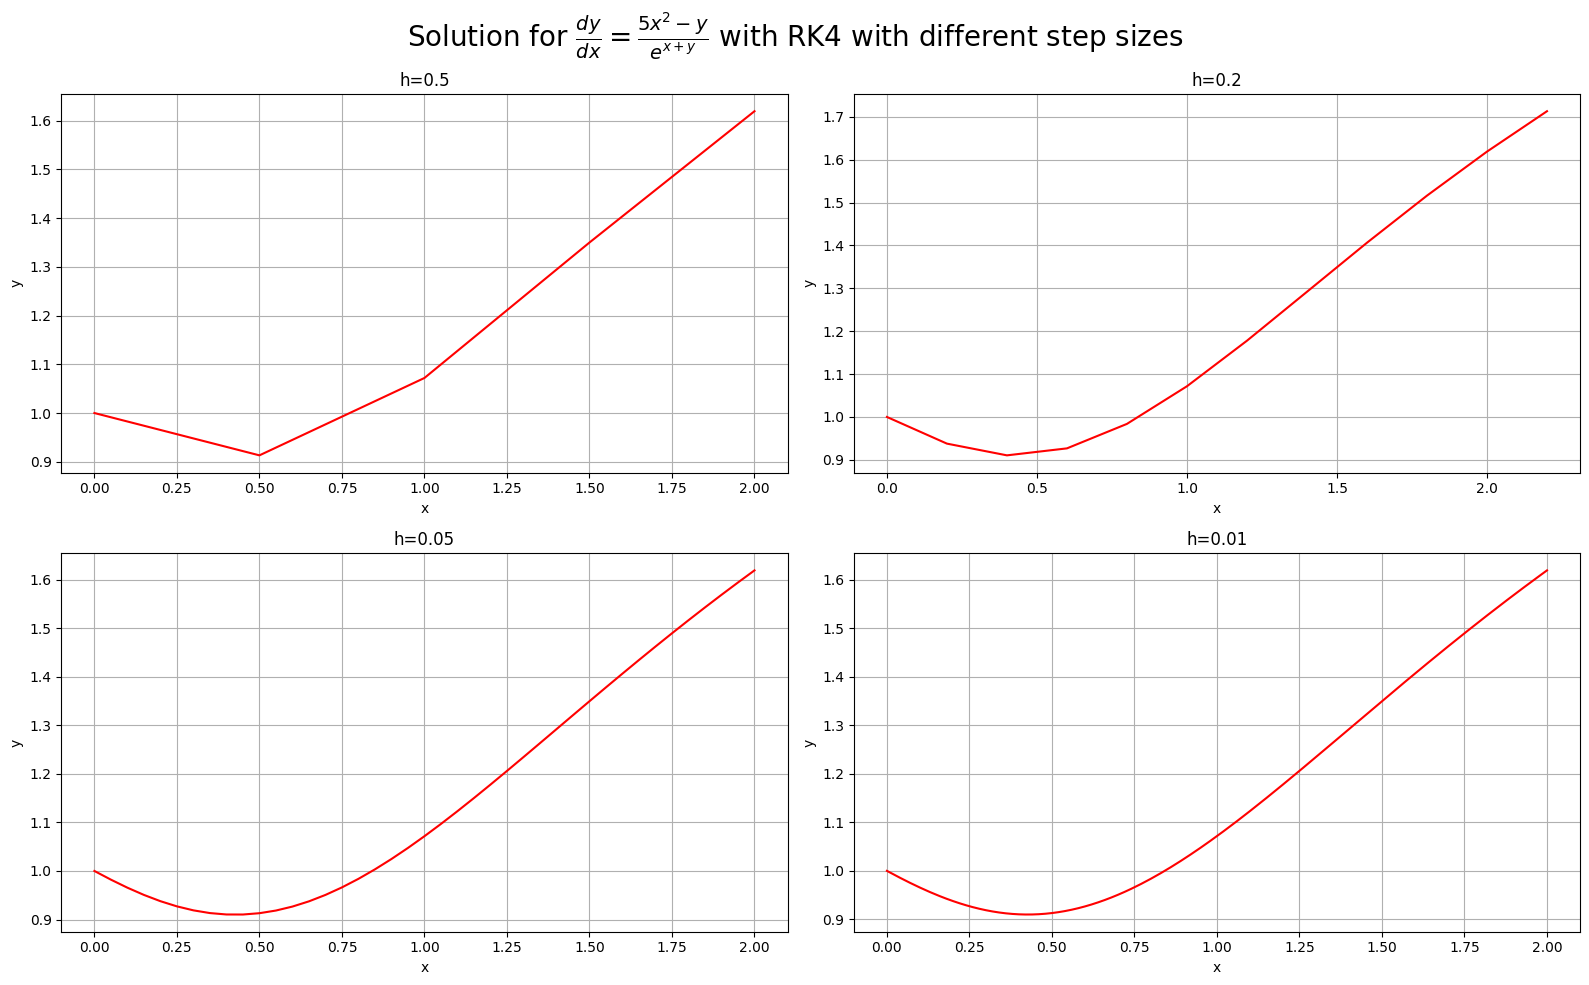

In [12]:
# Defining dy/dx=f(x,y)=(5x^2-y)/(e^(x+y))
def f3(x,y):
    return (5*x**2-y)/(np.exp(x+y))

# Defining the limits and Number of subintervals
a_q3 = 0
b_q3 = 2
y0=1
hlist=[0.5,0.2,0.05,0.01]
Nlist=[int((b_q3-a_q3)/h) for h in hlist]

# Calculating the y(x) using Runge-Kutta Method
XYlist=[[],[],[],[]]
for i in range(len(hlist)):
    p3=ODE_Solve_XY(f3,a_q3,y0,b_q3,Nlist[i])
    x,y=p3.RK4_solve()
    XYlist[i].append(x) 
    XYlist[i].append(y)
    del p3
    del x
    del y

# Displaying the result in table
table_qn3 = PrettyTable()
htablelist=[f"h={hlist[i]}" for i in range(len(hlist))]
table_qn3.field_names = htablelist
min_len=min([len(XYlist[i][0]) for i in range(len(hlist))])
for i in range(min_len):
    table_qn3.add_row([f"({round(XYlist[j][0][i],5)},{round(XYlist[j][1][i],5)})" for j in range(len(hlist))])
print(f"The items in the tables are coordinates (x,y) for each h value. The first value is x and the second value is y.")
print(f"The complete table is too large to display. Here are the first {min_len} rows:")    
print(table_qn3)

# Plotting the result
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
for i in range(len(hlist)):
    axs[i//2, i%2].plot(XYlist[i][0], XYlist[i][1],color='r')
    axs[i//2, i%2].set_title(f"h={hlist[i]}")
    axs[i//2, i%2].set_xlabel("x")
    axs[i//2, i%2].set_ylabel("y")
    axs[i//2, i%2].grid()
fig.suptitle(r'Solution for $\frac{dy}{dx} = \frac{5x^2-y}{e^{x+y}}$ with RK4 with different step sizes',fontsize=20)
plt.tight_layout()

plt.show()

### __Qn-4:__ Solve the heat equation $u_t = 4u_{xx}$, using Crank-Nicolson and your choice of α, subjected to the boundary conditions:

\begin{equation}
u(0,t)=0=u(8,t) \quad \text{and} \quad x(x,0)=4x-x^2/2
\end{equation}


### Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of α and inversion algorithm. Display the solution both in a table and a contour plot.

#### Answer Q4:

For the given question, the following conditions are given:
- $g(x)= u(x,0) = 4x-x^2/2$
- $u(0,t)=0=u(8,t)$
- a(t) = 0 = b(t)

The ulist contains all the list of u(x) values corresponding a time step. That is:
ulist[0] = contains u vs x for t=0
ulist[1] = contains u vs x for t= after 1st time step and so on

The table below shows the solution of the heat equation using Crank-Nicholson Method for few time steps
+-----+-----------------+-------------------+-------------------+
|  X  | Time step = 0.0 | Time step = 0.002 | Time step = 0.004 |
+-----+-----------------+-------------------+-------------------+
| 0.0 |       0.0       |        0.0        |        0.0        |
| 0.1 |      0.395      |       0.3987      |       0.401       |
| 0.2 |       0.78      |       0.7785      |       0.7777      |
| 0.3 |      1.155      |       1.153       |       1.1512      |
| 0.4 |       1.52      |       1.518       |       1.516       |
| 0.5 |      1.875      |       1.873       |       1.871       |
| 0.6 |       2.22      |       2.218       |       2.216       |
| 0.7 |      2.555      |       2.553       |       2.551       |
| 0.8 |       2.88      |       2.878       |       2.876       |
| 0.9 |      3.195      |       3.193       |       3.191       |
| 1.0 |       3.5       |       3.498 

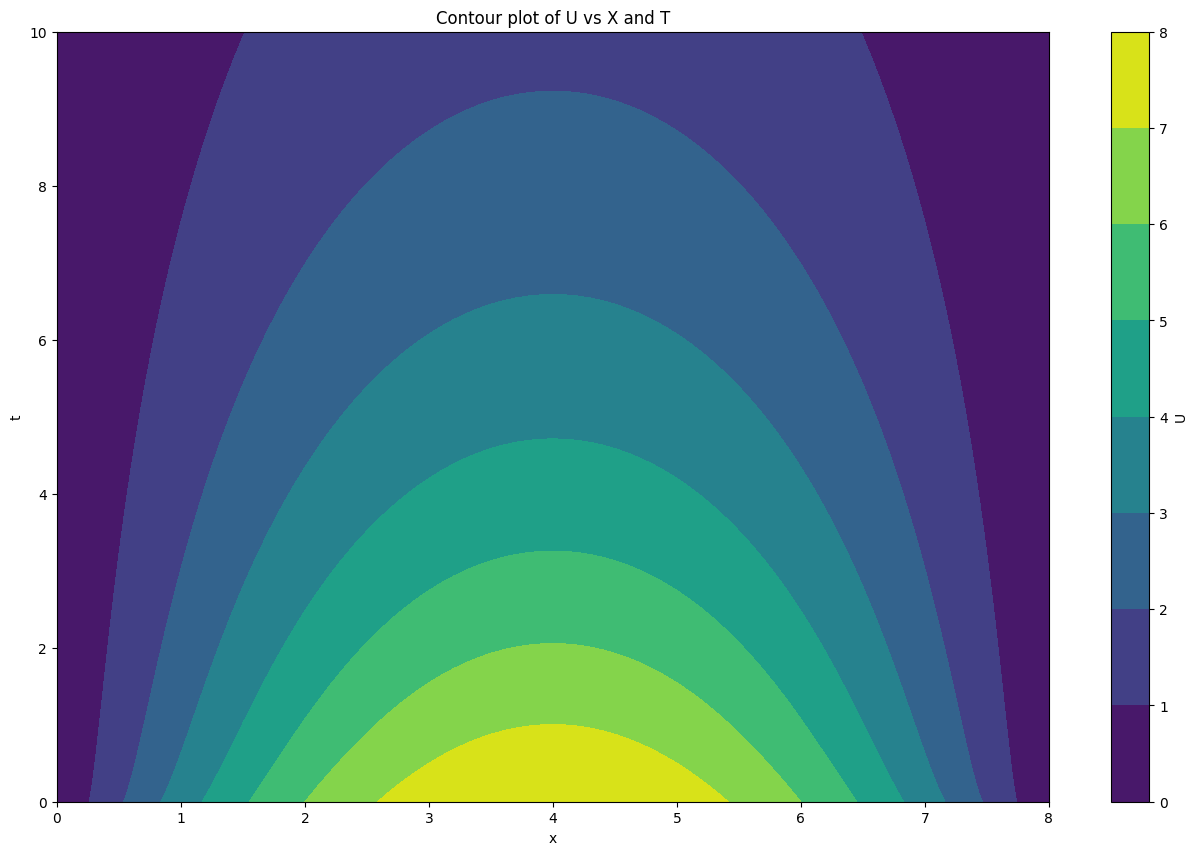

In [16]:
from prettytable import PrettyTable
def g(x):
    return (4*x) - (x**2)/2
'''
Defining the limits and Number of subintervals and other parameters
'''
x0 = 0
xN = 8
Nx = 80
Nt = 5000
T = 10
'''
Calculating the solution using Crank-Nicholson Method
'''
alpha = (T/Nt)/(((xN-x0)/Nx)**2)
X,T,U = crank_nicholson(g, x0, xN, Nx, Nt, T, alpha)
'''
Tabulating the Results
'''
print("The table below shows the solution of the heat equation using Crank-Nicholson Method for few time steps")
table = PrettyTable()
table.field_names = ['X', f"Time step = {T[0]}",f"Time step = {T[1]}",f"Time step = {T[2]}"]
for i in range(len(X)):
    table.add_row([round(X[i],4), round(U[0][i],4), round(U[1][i],4), round(U[2][i],4)])
print(table)
'''
PLotting the contour plots
'''
import matplotlib.pyplot as plt
# Contour plot of T
plt.figure(figsize=(16,10))
plt.contourf(X, T, U, cmap='viridis')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of U vs X and T')
plt.colorbar(label='U')
plt.show()

### __Qn-5:__ Solve the Poisson’s equation $u_{xx}+u_{yy} = xe^y$ in a 6^2 grid with boundary conditions:
***<p style="text-align: center;">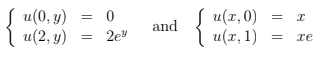</p>***

### Display the solution both in a table and a 3-D plot.


